In [1]:
import student as s
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
students = s.import_safe_file("students-2016-merged.xlsx")
repeating = s.import_safe_file("students-2016-repeating.xlsx")

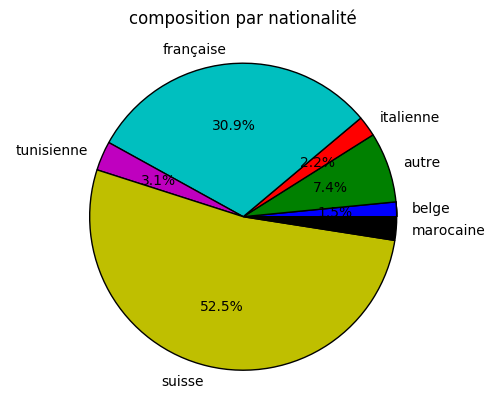

In [34]:
nationalities = []
for student in students:
    nationalities.append(student.data['nationality'])

counted = {}
for nat in nationalities:
    if nat in counted:
        counted[nat] += 1
    else:
        counted[nat] = 1
        
counted['autre'] = 0
for k in counted.keys():
    if counted[k] < 5:
        counted['autre'] += counted[k]
        counted[k] = 0
        
values = []
names = []
titles = {}
for k in counted.keys():
    if counted[k] != 0:
        values.append(float(counted[k]))
        names.append(k)
        titles[k] = counted[k]
        
plt.pie(values, labels=names,autopct='%1.1f%%')
plt.axis('equal')
plt.title("composition par nationalité", y=1.1)
plt.show()

In [6]:
num_repeating = 0
for student in students:
    for rep in repeating:
        if student.data['SCIPER'] == rep.data['SCIPER']:
            num_repeating += 1
            break
num_repeating

87

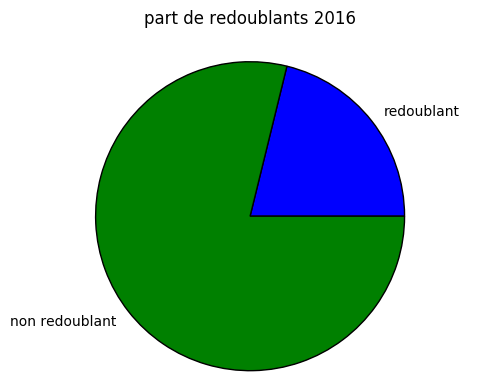

In [20]:
plt.pie([num_repeating,len(students)],labels=["redoublant","non redoublant"])
plt.axis('equal')
plt.title("part de redoublants 2016", y=1.1)
plt.show()

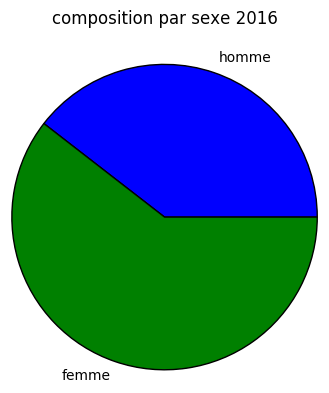

In [40]:
num_m = len(s.get_students_by_keys(students,{'sex':"M"}))
num_f = len(s.get_students_by_keys(students,{'sex':"F"}))
plt.pie([num_m,num_f],labels=["homme","femme"])
plt.axis('square')
plt.title("composition par sexe 2016", y=1.1)
plt.show()

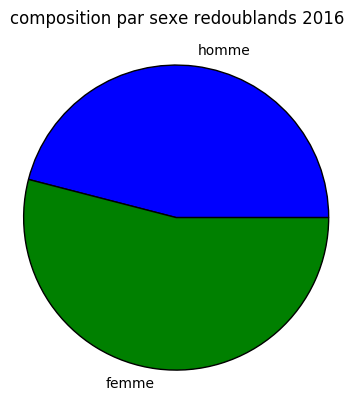

In [41]:
num_m = len(s.get_students_by_keys(repeating,{'sex':"M"}))
num_f = len(s.get_students_by_keys(repeating,{'sex':"F"}))
plt.pie([num_m,num_f],labels=["homme","femme"])
plt.axis('square')
plt.title("composition par sexe redoublands 2016", y=1.1)
plt.show()